In [3]:
#先run这个上传图片
from google.colab import files
# 选择并上传图像文件
uploaded = files.upload()
# 获取上传文件的路径
image_path = list(uploaded.keys())[0]


Saving origin.jpg to origin.jpg


[[ 54  92  52 ...  40  27  42]
 [ 93 108  86 ...  54  45  51]
 [ 54  91  46 ...  48  31  46]
 ...
 [209 222 209 ... 233 235 230]
 [188 210 180 ... 238 205 237]
 [213 229 211 ... 233 237 230]]
[[ 93 108  86 ...  54  45  51]
 [ 54  91  46 ...  48  31  46]
 [ 93 111  85 ...  50  43  56]
 ...
 [209 222 209 ... 233 235 230]
 [188 210 180 ... 238 205 237]
 [213 229 211 ... 233 237 230]]


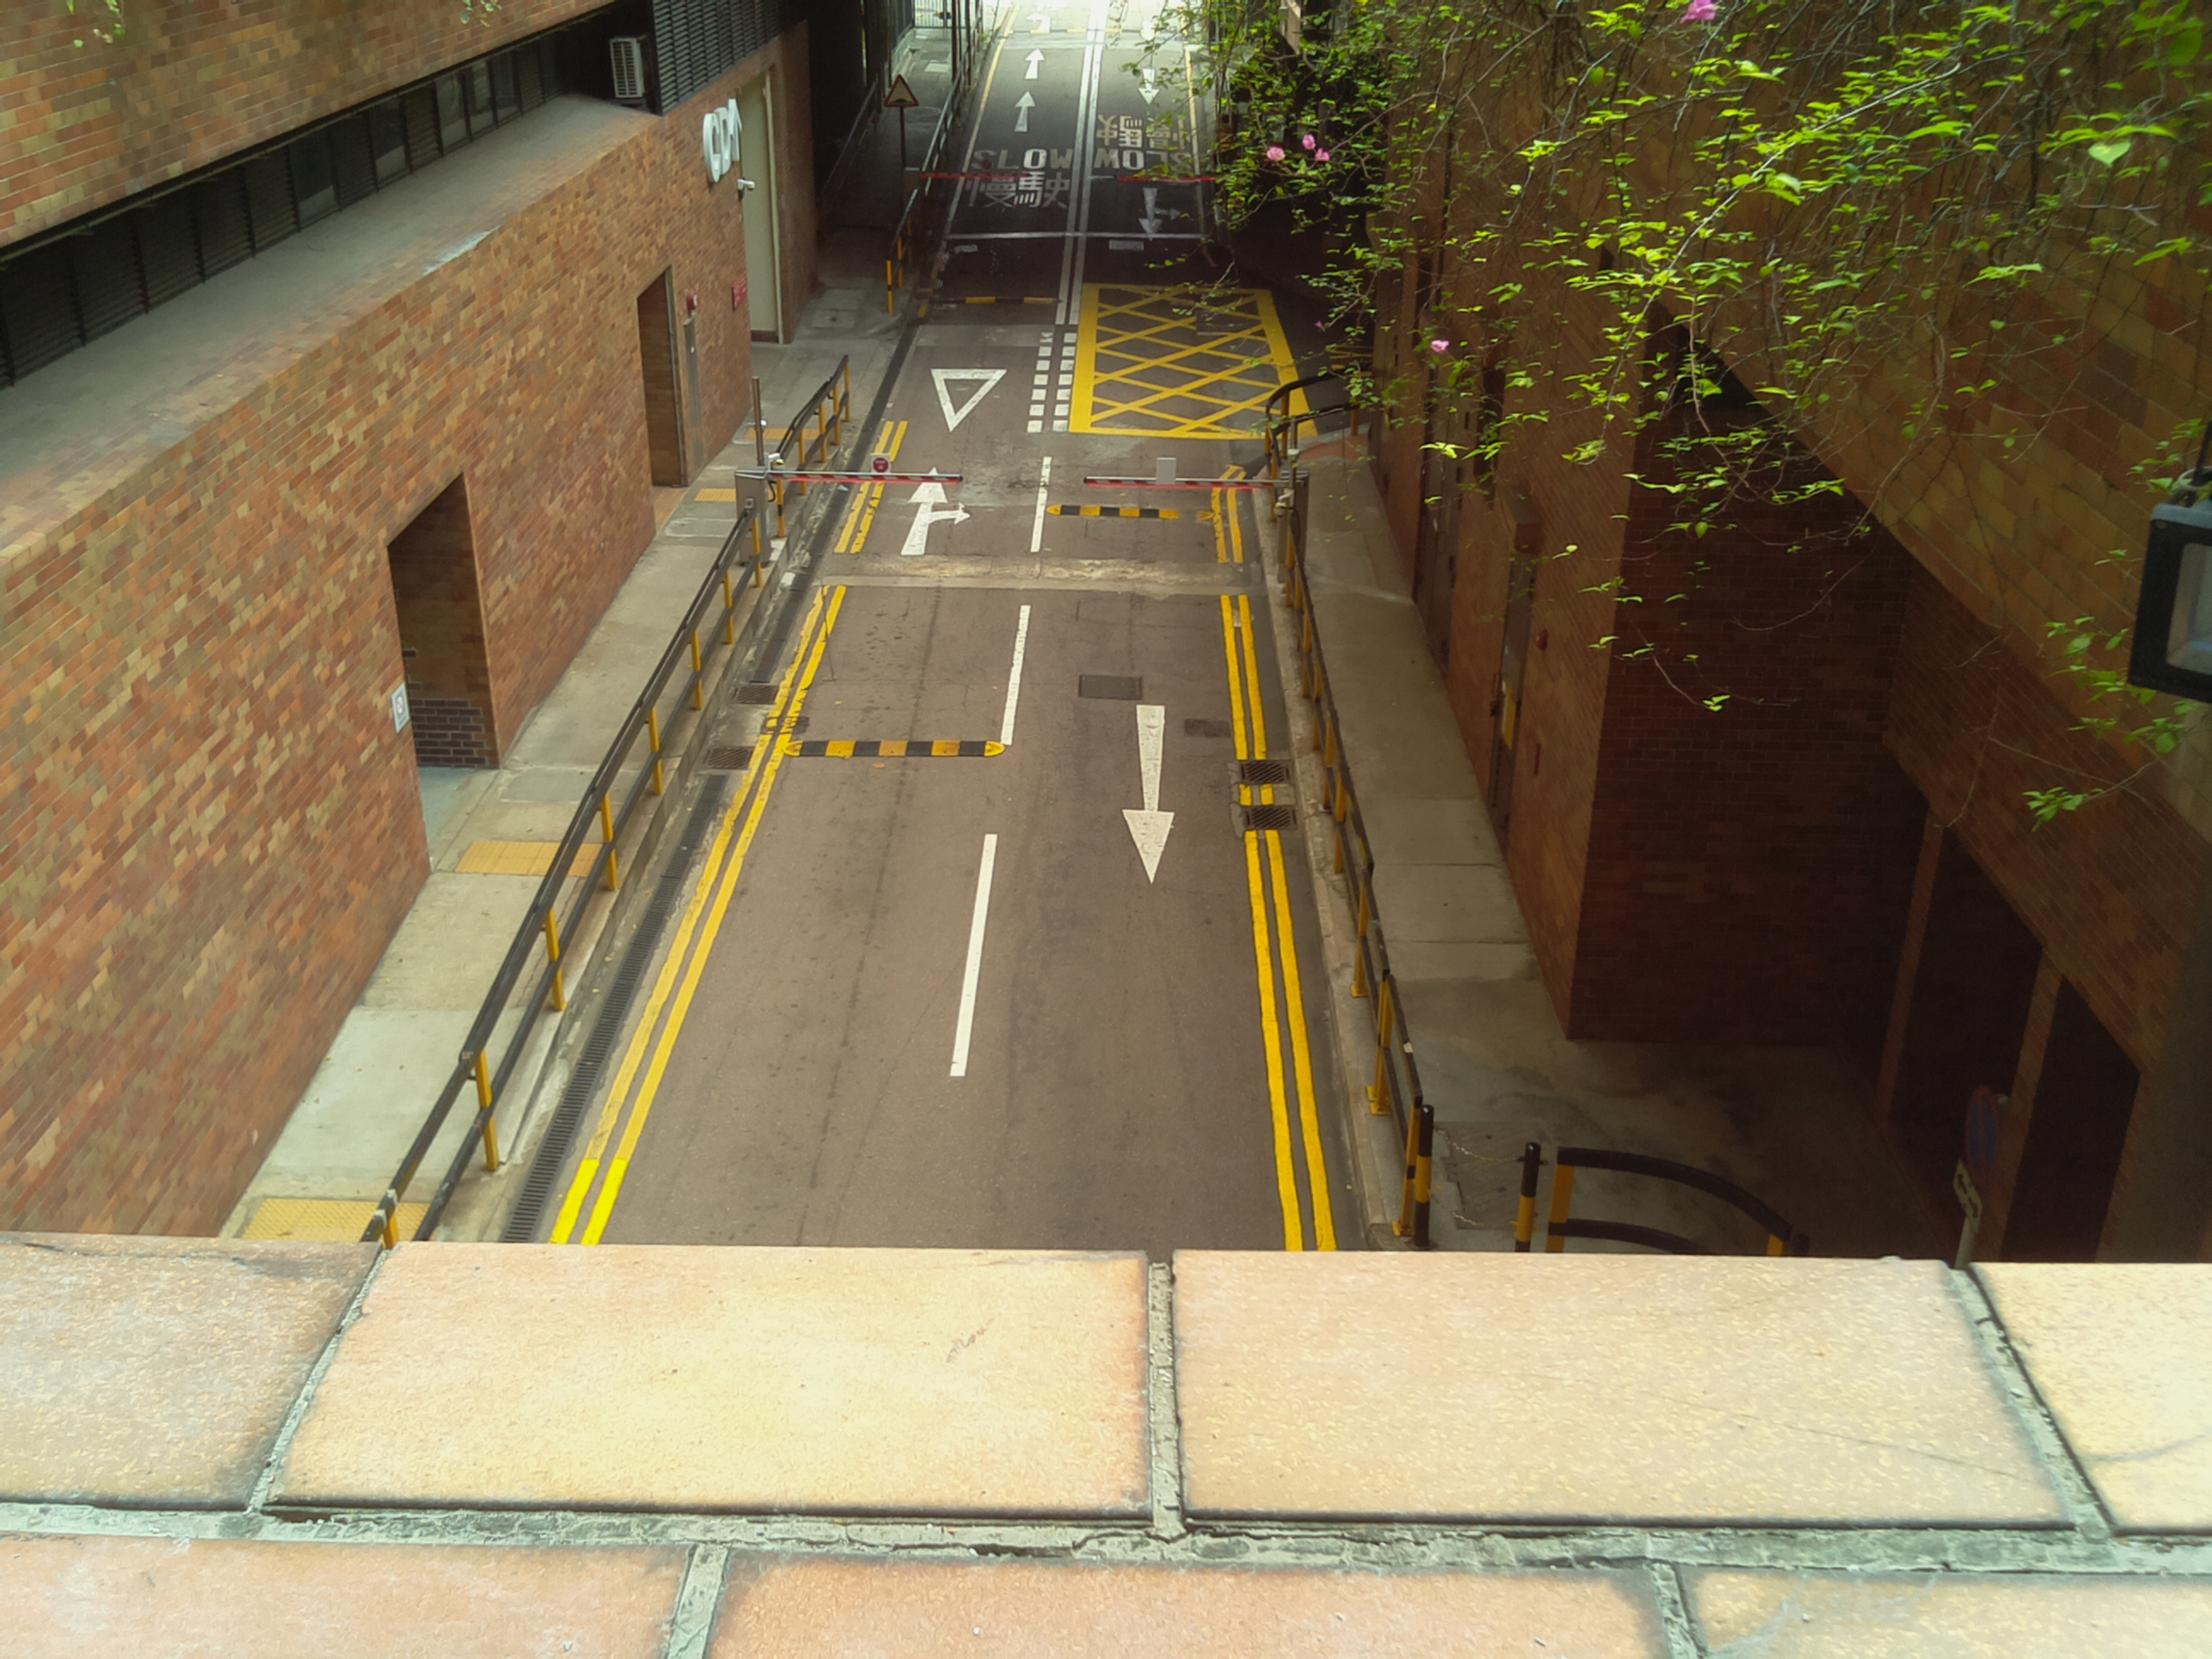

In [6]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Convert RGB image to Bayer BGGR image
def BGGR(rgb):
    bggr = np.empty_like(rgb[:, :, 0])

    for height in range(rgb.shape[0]):
        for width in range(rgb.shape[1]):
            pix = rgb[height, width]
            if height % 2 == 0 and width % 2 == 0:
                bggr[height, width] = pix[0]  # Blue
            elif height % 2 == 0 and width % 2 == 1:
                bggr[height, width] = pix[1]  # Green
            elif height % 2 == 1 and width % 2 == 0:
                bggr[height, width] = pix[1]  # Green
            else:
                bggr[height, width] = pix[2]  # Red

    return bggr


# Convert Bayer BG image with missing pixels to modified Bayer BG image
def simulate_missing_pixels(bggr):
    height, width = bggr.shape[:2]

    # # 生成一个与原始图像相同大小的新图像，但去掉了第一行
    # new_bayer = np.zeros((height - 1, width), dtype=bggr.dtype)
    # new_bayer[:,:] = bggr[1:,:]  # 将原始图像的第二行及其之后的像素复制到新图像中

    # 生成一个与原始图像相同大小的新图像，但删除正中间的一行像素
    new_bayer = np.zeros((height - 1, width), dtype=bggr.dtype)
    new_bayer[:height//2,:] = bggr[:height//2,:]  # 将原始图像上半部分的像素复制到新图像中
    new_bayer[height//2:,:] = bggr[(height//2)+1:,:]  # 将原始图像下半部分的像素复制到新图像中

    return new_bayer


if __name__ == "__main__":

    img = cv2.imread(image_path)
    if img is None:
        print("Error: Input file", image_path, "is error")
        sys.exit(1)

    out_bayer = BGGR(img)


    print(out_bayer)
    new_bayer = simulate_missing_pixels(out_bayer)
    print(new_bayer)

    # rgb = cv2.cvtColor(simulate_missing_pixels(BGGR(img)), cv2.COLOR_BayerBGGR2RGB)
    # rgb = cv2.cvtColor(out_bayer, cv2.COLOR_BayerBGGR2RGB)
    # rgb = cv2.cvtColor(out_bayer, cv2.COLOR_BayerBGGR2RGB)
    rgb = cv2.cvtColor(new_bayer, cv2.COLOR_BayerBGGR2RGB)
    cv2_imshow(rgb)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
#依然是检测相关性
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from scipy.stats import pearsonr

# Convert RGB image to Bayer BG image
def RGB2BayerBG(rgb):
    bayerbg = np.empty_like(rgb[:, :, 0])

    for height in range(rgb.shape[0]):
        for width in range(rgb.shape[1]):
            pix = rgb[height, width]
            if height % 2 == 0 and width % 2 == 0:
                bayerbg[height, width] = pix[0]  # Blue
            elif height % 2 == 0 and width % 2 == 1:
                bayerbg[height, width] = pix[1]  # Green
            elif height % 2 == 1 and width % 2 == 0:
                bayerbg[height, width] = pix[1]  # Green
            else:
                bayerbg[height, width] = pix[2]  # Red

    return bayerbg


if __name__ == "__main__":
    # image_path = image_path  # Replace with the actual path to your input RGB image

    img = cv2.imread(image_path)
    if img is None:
        print("Error: Input file", image_path, "is error")
        sys.exit(1)

    out_bayer = RGB2BayerBG(img)

    # Convert Bayer BG image back to RGB
    reconstructed_rgb = cv2.cvtColor(out_bayer, cv2.COLOR_BayerBG2RGB)

    # Calculate Pearson correlation coefficients
    r_corr, _ = pearsonr(img[:, :, 2].flatten(), reconstructed_rgb[:, :, 2].flatten())
    g_corr, _ = pearsonr(img[:, :, 1].flatten(), reconstructed_rgb[:, :, 1].flatten())
    b_corr, _ = pearsonr(img[:, :, 0].flatten(), reconstructed_rgb[:, :, 0].flatten())

    print("R channel correlation:", r_corr)
    print("G channel correlation:", g_corr)
    print("B channel correlation:", b_corr)

R channel correlation: 0.9985929090379801
G channel correlation: 0.9995174441348337
B channel correlation: 0.9982756765475592
